<a href="https://colab.research.google.com/github/Denisganga/the_plant_doctor/blob/main/The_plant_doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#importing the required modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import torchvision.transforms as transforms

Mounted at /content/drive


In [2]:
from torchvision import datasets
from torch.utils.data import random_split
import numpy as np
import random

In [3]:
#unzipping my dataset
import zipfile

zip_file_path =  "/content/drive/My Drive/the_plant_doctor/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [4]:
# Define the data directory (the path where your unzipped dataset is located)
data_dir="/content/dataset"

In [5]:
#setup device agnostic code(using the GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
#define the transformations
data_transforms =transforms.Compose([
    #make the model more robust to differently oriented images.
    transforms.RandomRotation(degrees=15),

    #random cropping of images to create multiple views of the same image
    transforms.RandomCrop(size=(224,224), padding=10),

    #Apply random color transformations to the images to make the model more invariant to changes in lighting and color
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2,hue=0.2),

    #help the model focus on important features and reduce noise
    transforms.GaussianBlur(kernel_size=3),

    #resize and crop the image to create variations in the field of view.
    transforms.RandomResizedCrop(size=(224,224), scale=(0.8, 1.0)),

    #introduce controlled occlusions or "erasing" of parts of the image during training
    transforms.RandomErasing(),

    #Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),

    #Convert the image to a PyTorch tensor
    transforms.ToTensor(),

     # Normalize the image based on typical RGB mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])



])

In [7]:
#create a dataset using ImageFolder
dataset= datasets.ImageFolder(data_dir, transform=data_transforms)

In [8]:
# Define class labels based on the dataset structure
classes = dataset.classes

In [9]:
#splitting the dataset into training and testing sets
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset,[train_size, test_size])

In [10]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

41276
33020
8256


In [20]:
image, label = train_dataset[0]
image, label

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.0494, -1.9980, -1.9809],
          [-1.9809, -1.9809, -1.9467,  ..., -1.2617, -0.8335, -0.7993],
          ...,
          [ 0.5022,  0.1939, -0.0629,  ..., -0.2513, -0.3883, -0.3883],
          [ 0.3309,  0.2967,  0.1254,  ..., -0.4911, -0.5767, -0.7308],
          [-0.0629, -0.0801,  0.0741,  ..., -0.4397, -0.6794, -0.9363]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9482, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8606,  ..., -1.0903, -0.6877, -0.6352],
          ...,
          [ 0.6254,  0.3102,  0.0301,  ..., -0.2500, -0.3725, -0.3901],
          [ 0.4503,  0.3978,  0.2227,  ..., -0.4951, -0.5826, -0.7402],
          [ 0.0301,  0.0126,  0.1702,  ..., -0.4426, -0.6877, -0.9503]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [26]:
image.shape

torch.Size([3, 224, 224])

In [22]:
# See classes
class_names = dataset.classes

class_names

['PlantVillage', 'plantvillage']

In [27]:

#contents of plantvillages and PlantVillages directories
import os

# Define the paths to the "PlantVillage" and "plantvillage" directories
plant_village_path = os.path.join(data_dir, "PlantVillage")
plant_village_lower_path = os.path.join(data_dir, "plantvillage")

# List the subdirectories within "PlantVillage"
plant_village_classes = os.listdir(plant_village_path)

# List the subdirectories within "plantvillage"
plant_village_lower_classes = os.listdir(plant_village_lower_path)

print("Classes in 'PlantVillage':", plant_village_classes)
print("Classes in 'plantvillage':", plant_village_lower_classes)

Classes in 'PlantVillage': ['Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Potato___healthy']
Classes in 'plantvillage': ['PlantVillage']


In [34]:
# Define the path to the "PlantVillage" directory
plant_village_dir = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
plant_village_subclasses = os.listdir(plant_village_dir)

# Print the class labels within "PlantVillage"
print("Subclasses in 'PlantVillage':", plant_village_subclasses)

Subclasses in 'PlantVillage': ['Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Potato___healthy']


In [33]:
len(plant_village_classes)

15

In [41]:
#create a Dataloader for efficient dataloading and batch
batch_size = 7
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_data_loader,train_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7eaff5406ce0>,
 <torch.utils.data.dataloader.DataLoader at 0x7eaff5407580>)

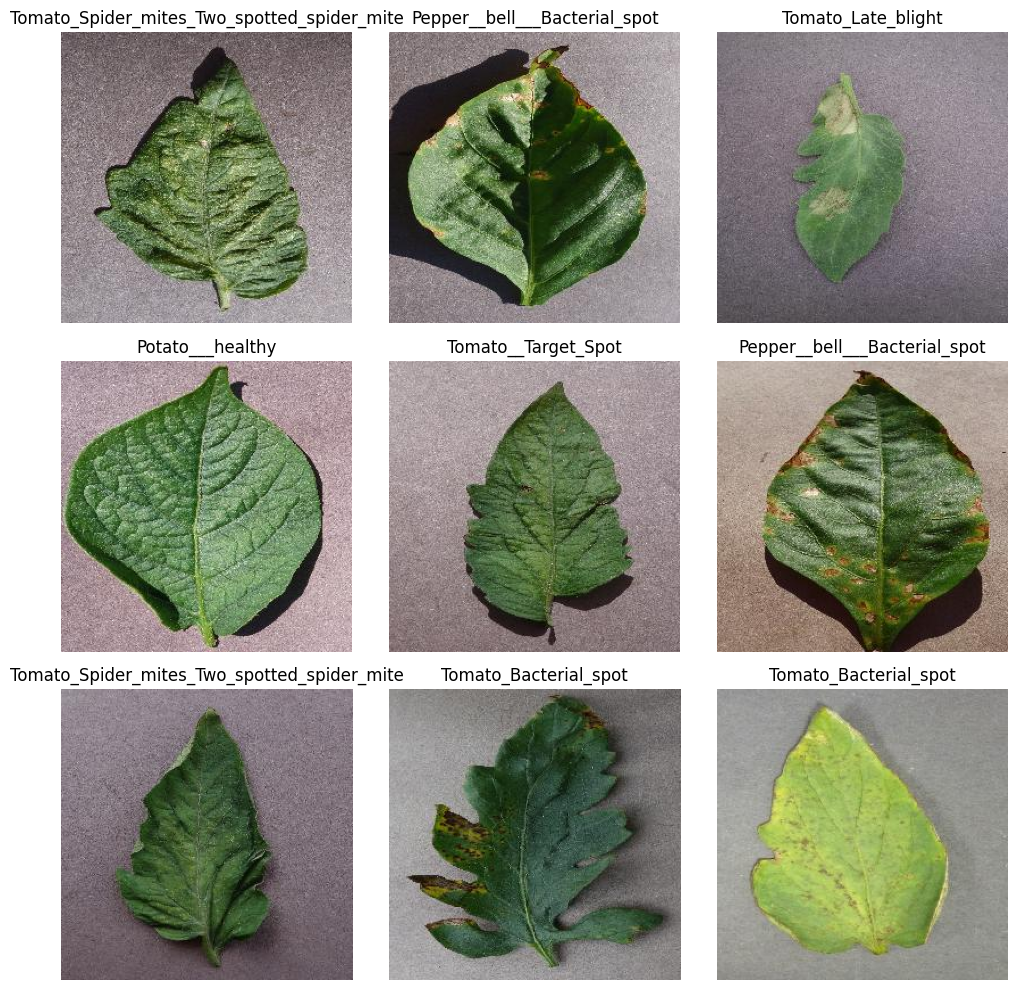

In [31]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the "PlantVillage" directory
plant_village_path = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
class_labels = os.listdir(plant_village_path)

# Create a 3x3 grid to display random images
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows * num_cols):
    # Randomly select a class label
    random_label = random.choice(class_labels)

    # Find a random image within the class directory
    class_dir = os.path.join(plant_village_path, random_label)
    image_files = os.listdir(class_dir)
    random_image_file = os.path.join(class_dir, random.choice(image_files))
    random_image = Image.open(random_image_file)

    # Plot the image
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(random_image)
    axes[row, col].set_title(random_label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


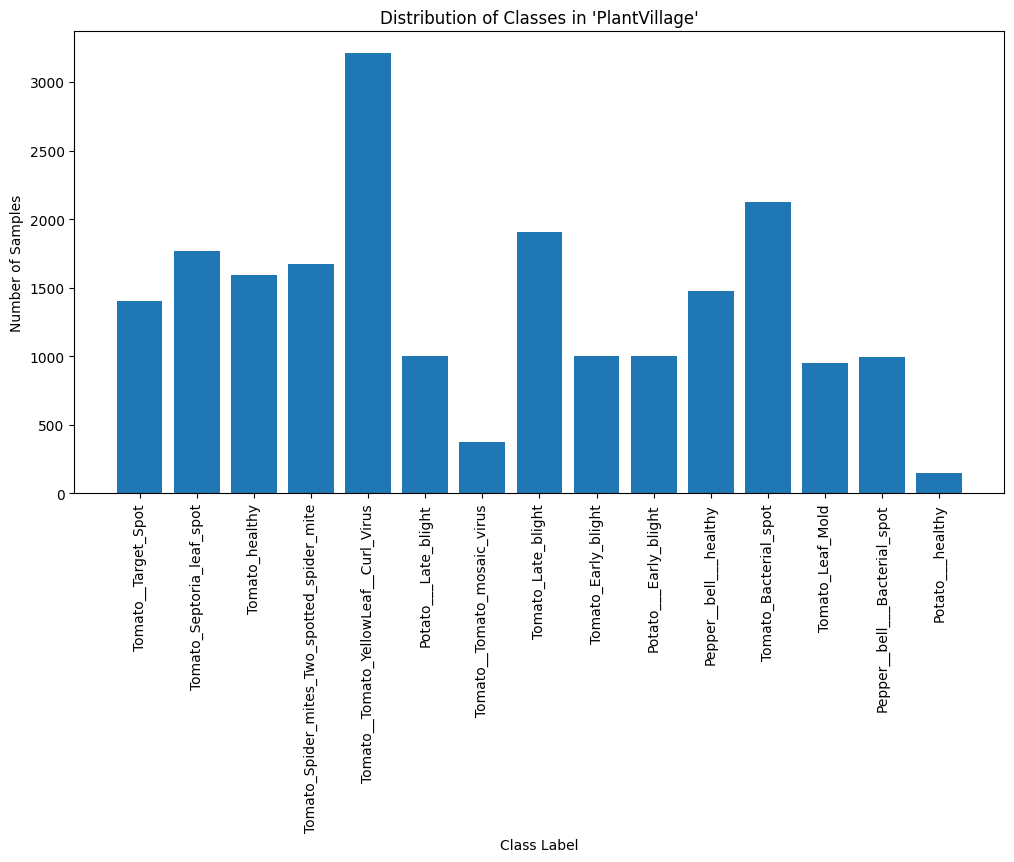

In [38]:

# Count the number of samples in each class
class_counts = [ len(os.listdir(os.path.join(plant_village_path, class_label))) for class_label in class_labels]

# Create a bar chart (histogram) to visualize the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.show()
